In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys
import coffea.util as util
import time
import json
import os
import copy
from hist import Hist
sys.path.append("../../analysisTools/")
import plotTools as ptools
import mplhep as hep
import utils
hep.style.use("CMS")
plt.rcParams['font.size'] = 16.0
from matplotlib.colors import Normalize, LogNorm
from copy import deepcopy
from tqdm import tqdm

In [2]:
class histLoader2:
    def __init__(self,file):
        self.histos = util.load(file)
        self.hnames = list(self.histos.keys())
    def load(self,hname):
        return self.histos[hname]
    def names(self,spec=None):
        if spec is not None:
            print("\n".join([h for h in self.hnames if spec in h]))
        else:
            print("\n".join(self.hnames))

In [44]:
hv5 = histLoader2("genPlots_withXclean_histos_vtxEff.coffea")
dfs = utils.get_dict_fromCutflow(hv5.load('cutflow'))
def make_label(row):
    m1 = int(row['m1'])
    delta = int(100*row['delta'])
    ct = int(row['ctau'])
    label = f"{delta}%, {m1} GeV, {ct} mm"
    return label
dfs['legend'] = dfs.apply(make_label,axis=1)

In [41]:
h = hv5.load("signalReco_vs_vtxMatch_BaseID")[{"samp":"sig_2018_Mchi-52p5_dMchi-5p0_ctau-1","cut":"no_presel"}]

In [42]:
for i in [0,1]:
    for j in [0,1]:
        for k in [0,1]:
            for l in [0,1]:
                f = h[{'sigReco':i,'vtxMatch':j,'sigRecoPassID':k,'vtxPassID':l}].value
                print(f"Reco {i}, vMatch {j}, recoID {k}, vtxID {l}",f)

Reco 0, vMatch 0, recoID 0, vtxID 0 0.7858570486937424
Reco 0, vMatch 0, recoID 0, vtxID 1 0.0
Reco 0, vMatch 0, recoID 1, vtxID 0 0.0
Reco 0, vMatch 0, recoID 1, vtxID 1 0.0
Reco 0, vMatch 1, recoID 0, vtxID 0 0.0
Reco 0, vMatch 1, recoID 0, vtxID 1 0.0
Reco 0, vMatch 1, recoID 1, vtxID 0 0.0
Reco 0, vMatch 1, recoID 1, vtxID 1 0.0
Reco 1, vMatch 0, recoID 0, vtxID 0 8.913254055187281e-05
Reco 1, vMatch 0, recoID 0, vtxID 1 0.0
Reco 1, vMatch 0, recoID 1, vtxID 0 7.680288558731263e-05
Reco 1, vMatch 0, recoID 1, vtxID 1 0.0
Reco 1, vMatch 1, recoID 0, vtxID 0 0.026314967697771863
Reco 1, vMatch 1, recoID 0, vtxID 1 0.0
Reco 1, vMatch 1, recoID 1, vtxID 0 0.0
Reco 1, vMatch 1, recoID 1, vtxID 1 0.18766206497048188


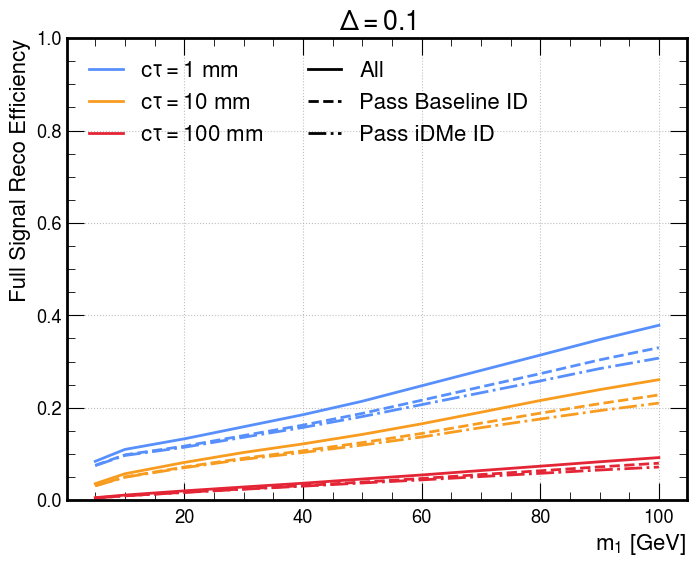

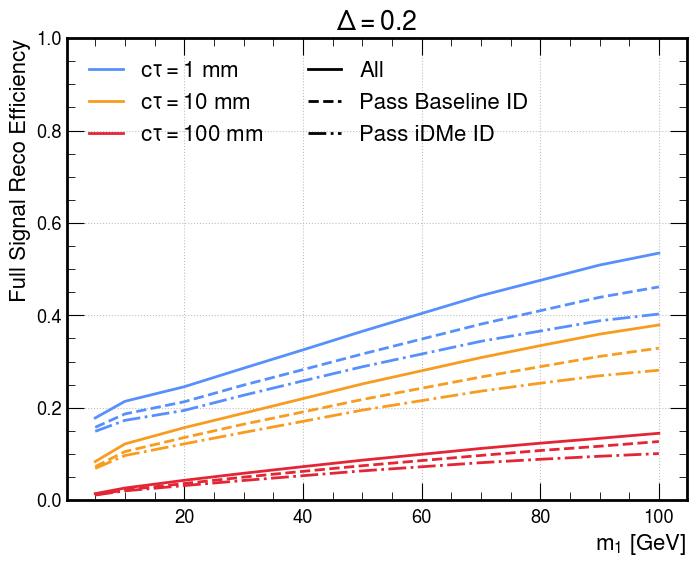

In [67]:
from matplotlib.lines import Line2D
deltas = sorted(list(set(dfs.delta)))
for delta in deltas:
    dcut1 = dfs[dfs.delta==delta]
    ctaus = sorted(list(set(dcut1.ctau)))
    plt.figure(figsize=(8,6))
    ctau_handles = []
    for i,ctau in enumerate(ctaus):
        dcut2 = dcut1[dcut1.ctau==ctau]
        m1s = sorted(list(set(dcut2.m1)))
        total_eff = []
        #total_eff_novtx = []
        total_eff_BaseID = []
        total_eff_dRID = []
        for m1 in m1s:
            samp = dcut2[dcut2.m1==m1].name.item()
            hbase = hv5.load("signalReco_vs_vtxMatch_BaseID")[{"samp":samp,"cut":"no_presel"}]
            hdr = hv5.load("signalReco_vs_vtxMatch_dRID")[{"samp":samp,"cut":"no_presel"}]
            total_eff.append(hbase[{'sigReco':1,'vtxMatch':1,'sigRecoPassID':sum,'vtxPassID':sum}].value)
            #total_eff_novtx.append(hbase[{'sigReco':1,'vtxMatch':0,'sigRecoPassID':sum,'vtxPassID':sum}].value)
            total_eff_BaseID.append(hbase[{'sigReco':1,'vtxMatch':1,'sigRecoPassID':1,'vtxPassID':1}].value)
            total_eff_dRID.append(hdr[{'sigReco':1,'vtxMatch':1,'sigRecoPassID':1,'vtxPassID':1}].value)
        handle,=plt.plot(m1s,total_eff,lw=2,linestyle='-',color=f"C{i}",label=f"$c\\tau = {int(ctau)}$ mm")
        ctau_handles.append(handle)
        plt.plot(m1s,total_eff_BaseID,lw=2,linestyle='--',color=f"C{i}")
        plt.plot(m1s,total_eff_dRID,lw=2,linestyle='-.',color=f"C{i}")
        #plt.plot(m1s,total_eff_novtx,lw=2,linestyle=':',color=f"C{i}")
    #plt.yscale('log')
    plt.ylim([0,1])
    plt.title(f"$\Delta = {delta}$")
    plt.grid()
    style_handles = [Line2D([],[],lw=2,linestyle='-',color='k',label='All'),
                     Line2D([],[],lw=2,linestyle='--',color='k',label='Pass Baseline ID'),
                     Line2D([],[],lw=2,linestyle='-.',color='k',label='Pass iDMe ID')]
    plt.legend(handles=ctau_handles+style_handles,ncol=2,loc='upper left',fontsize=16)
    plt.ylabel("Full Signal Reco Efficiency")
    plt.xlabel("$m_1$ [GeV]")
    
    outD = "plots_withXcleanInfo/recoAndVtxEfficiency/summary/"
    os.makedirs(outD,exist_ok=True)
    plt.savefig(f"{outD}/totalRecoAndVtxEff_signalSummary_delta{delta}_withXclean.pdf")
    #plt.close()

In [68]:
hv5.names()

signalReco_vs_vtxMatch_BaseID
signalReco_vs_vtxMatch_dRID
genEPMatched_BaseID
genEPMatched_dRID
genEPMatched_vtxMatched_BaseID
genEPMatched_vtxMatched_dRID
signalReco_vs_vtxMatch_BaseID_unwgt
signalReco_vs_vtxMatch_dRID_unwgt
genEPMatched_BaseID_unwgt
genEPMatched_dRID_unwgt
genEPMatched_vtxMatched_BaseID_unwgt
genEPMatched_vtxMatched_dRID_unwgt
cutDesc
cutflow
cutflow_cts
cutflow_nevts


In [69]:
h = hv5.load("genEPMatched_BaseID")[{"samp":"sig_2018_Mchi-52p5_dMchi-5p0_ctau-1","cut":"no_presel"}]

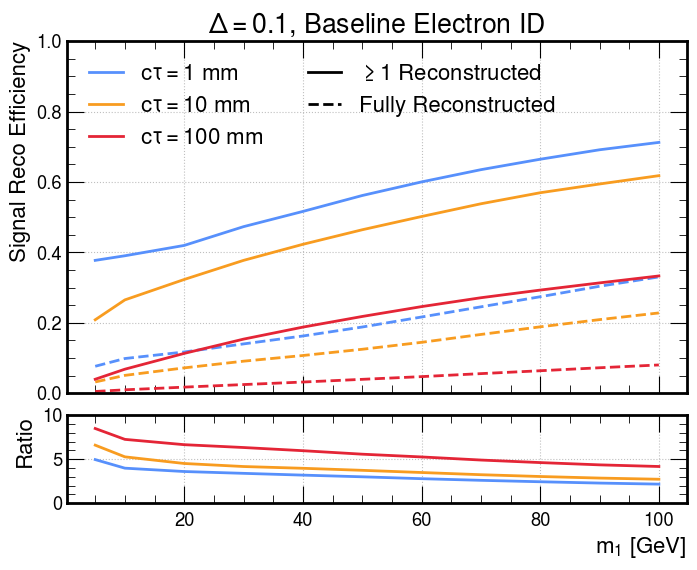

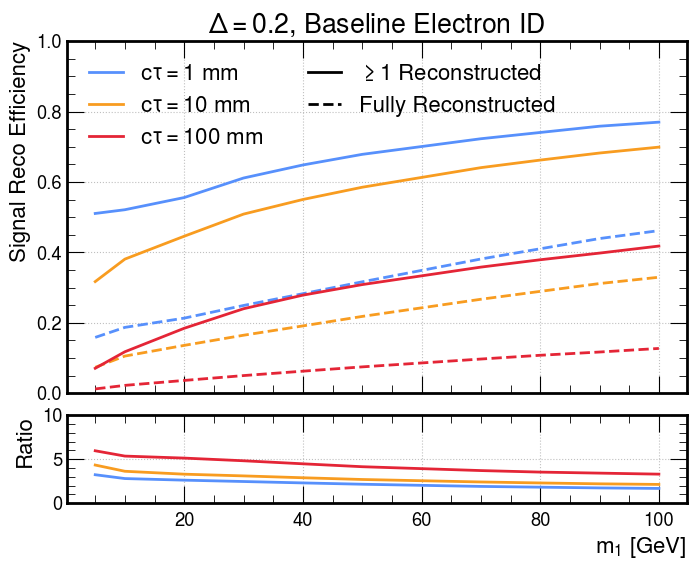

In [101]:
from matplotlib.lines import Line2D
deltas = sorted(list(set(dfs.delta)))
for delta in deltas:
    dcut1 = dfs[dfs.delta==delta]
    ctaus = sorted(list(set(dcut1.ctau)))
    fig,axes = plt.subplots(2,1,figsize=(8,6),height_ratios=[4,1],sharex=True)
    plt.subplots_adjust(hspace=0.1)
    ctau_handles = []
    for i,ctau in enumerate(ctaus):
        dcut2 = dcut1[dcut1.ctau==ctau]
        m1s = sorted(list(set(dcut2.m1)))
        
        total_eff = []
        partial_eff = []
        for m1 in m1s:
            samp = dcut2[dcut2.m1==m1].name.item()
            hbase = hv5.load("genEPMatched_BaseID")[{"samp":samp,"cut":"no_presel"}]
            total_eff.append(hbase[{'eMatch':1,'pMatch':1,'eID':1,'pID':1}].value)
            partial_eff.append(hbase[{'eMatch':0,'pMatch':1,'eID':sum,'pID':1}].value + hbase[{'eMatch':1,'pMatch':0,'eID':1,'pID':sum}].value +\
                               hbase[{'eMatch':1,'pMatch':1,'eID':1,'pID':1}].value)
        
        plt.sca(axes[0])
        handle, = plt.plot(m1s,partial_eff,lw=2,linestyle='-',color=f"C{i}",label=f"$c\\tau = {int(ctau)}$ mm")
        plt.plot(m1s,total_eff,lw=2,linestyle='--',color=f"C{i}")
        ctau_handles.append(handle)
        plt.sca(axes[1])
        plt.plot(m1s,np.array(partial_eff)/np.array(total_eff),lw=2,linestyle='-',color=f"C{i}")
    
    plt.sca(axes[0])
    plt.ylim([0,1])
    plt.title(f"$\Delta = {delta}$, Baseline Electron ID")
    plt.grid()
    style_handles = [Line2D([],[],lw=2,linestyle='-',color='k',label='$\geq 1$ Reconstructed'),
                     Line2D([],[],lw=2,linestyle='--',color='k',label='Fully Reconstructed')]
    plt.legend(handles=ctau_handles+style_handles,ncol=2,loc='upper left',fontsize=16)
    plt.ylabel("Signal Reco Efficiency")
    plt.sca(axes[1])
    plt.ylabel("Ratio")
    plt.xlabel("$m_1$ [GeV]")
    plt.ylim([0,10])
    plt.grid()
    
    outD = "plots_withXcleanInfo/recoAndVtxEfficiency/summary/"
    os.makedirs(outD,exist_ok=True)
    plt.savefig(f"{outD}/fullAndPartialRecoEff_signalSummary_delta{delta}_withXclean.pdf")

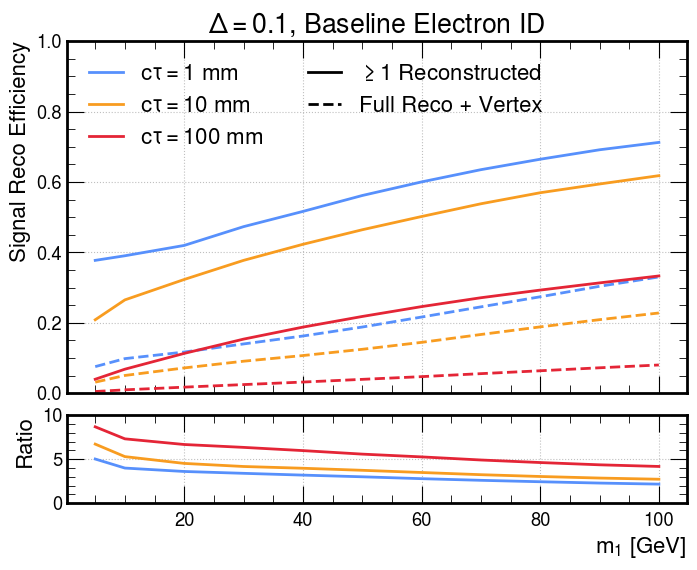

In [104]:
from matplotlib.lines import Line2D
deltas = sorted(list(set(dfs.delta)))
for delta in deltas:
    dcut1 = dfs[dfs.delta==delta]
    ctaus = sorted(list(set(dcut1.ctau)))
    fig,axes = plt.subplots(2,1,figsize=(8,6),height_ratios=[4,1],sharex=True)
    plt.subplots_adjust(hspace=0.1)
    ctau_handles = []
    for i,ctau in enumerate(ctaus):
        dcut2 = dcut1[dcut1.ctau==ctau]
        m1s = sorted(list(set(dcut2.m1)))
        
        total_recoEff = []
        partial_recoEff = []
        for m1 in m1s:
            samp = dcut2[dcut2.m1==m1].name.item()
            hbase = hv5.load("genEPMatched_vtxMatched_BaseID")[{"samp":samp,"cut":"no_presel"}]
            total_recoEff.append(hbase[{'eMatch':1,'pMatch':1,'eID':1,'pID':1,'vtxMatch':1,'vtxPassID':1}].value)
            partial_recoEff.append(hbase[{'eMatch':0,'pMatch':1,'eID':sum,'pID':1,'vtxMatch':sum,'vtxPassID':sum}].value +\
                                   hbase[{'eMatch':1,'pMatch':0,'eID':1,'pID':sum,'vtxMatch':sum,'vtxPassID':sum}].value +\
                                   hbase[{'eMatch':1,'pMatch':1,'eID':1,'pID':1,'vtxMatch':sum,'vtxPassID':sum}].value)
        
        plt.sca(axes[0])
        handle,=plt.plot(m1s,partial_recoEff,lw=2,linestyle='-',color=f"C{i}",label=f"$c\\tau = {int(ctau)}$ mm")
        ctau_handles.append(handle)
        plt.plot(m1s,total_recoEff,lw=2,linestyle='--',color=f"C{i}")
        plt.sca(axes[1])
        plt.plot(m1s,np.array(partial_recoEff)/np.array(total_recoEff),lw=2,linestyle='-',color=f"C{i}")
    
    plt.sca(axes[0])
    plt.ylim([0,1])
    plt.title(f"$\Delta = {delta}$, Baseline Electron ID")
    plt.grid()
    style_handles = [Line2D([],[],lw=2,linestyle='-',color='k',label='$\geq 1$ Reconstructed'),
                     Line2D([],[],lw=2,linestyle='--',color='k',label='Full Reco + Vertex')]
    plt.legend(handles=ctau_handles+style_handles,ncol=2,loc='upper left',fontsize=16)
    plt.ylabel("Signal Reco Efficiency")
    plt.sca(axes[1])
    plt.ylabel("Ratio")
    plt.xlabel("$m_1$ [GeV]")
    plt.ylim([0,10])
    plt.grid()
    
    outD = "plots_withXcleanInfo/recoAndVtxEfficiency/summary/"
    os.makedirs(outD,exist_ok=True)
    plt.savefig(f"{outD}/fullAndPartialRecoVtxEff_signalSummary_delta{delta}_withXclean.pdf")
plt.close()